In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# import skimage io  to read, show and hanlde an image
# https://scikit-image.org/docs/dev/api/skimage.io.html

from skimage import io
from sklearn.cluster import KMeans

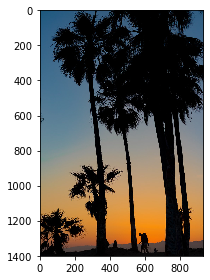

In [4]:
# read the image
img = io.imread('./assets/palm_trees.jpg')
io.imshow(img)

In [10]:
img.shape

(1401, 934, 3)

Notice it is a 3 dimensional array,
- hight : 1401
- width : 934
- channels : 3

In [12]:
# in order to use this image for k means clustering we have to convert it into
# x feature set, where each column will represnt the corresponding RGB values
# we can reshape it into H*W

In [14]:
# flatten the image

In [34]:
(row,column,dimension) =  img.shape

In [35]:
flat_img = img.reshape(row * column,dimension)

In [36]:
flat_img

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [37]:
flat_img.shape

(1308534, 3)

In [62]:
k_mean = KMeans(n_clusters=4)

In [63]:
k_mean.fit(flat_img)

KMeans(n_clusters=4)

In [64]:
# replace each pixel values with it's near by centroid 
k_mean.cluster_centers_

array([[211.43177179, 142.41316969,  66.93620819],
       [  4.27202423,   4.01397054,   5.1441965 ],
       [ 72.6255971 , 100.93865647, 123.14017745],
       [150.57427745, 147.54778423, 137.95594224]])

In [65]:
k_mean.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [66]:
compressed_image = k_mean.cluster_centers_[k_mean.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)


In [67]:
compressed_image = compressed_image.reshape(row,column,3)

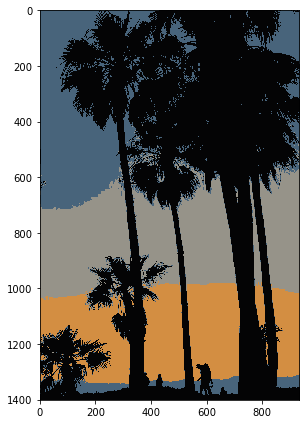

In [68]:
plt.figure(figsize=(6,6))
io.imshow(compressed_image)

In [52]:
io.imsave('compressed_image_64.png', compressed_image)